In [1]:
# Using nbviewer, py3Dmol works
# https://nbviewer.jupyter.org/github/iwatobipen/playground/blob/master/rotation_mol2.ipynb
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolTransforms
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import rdBase
from IPython import display
import copy
import py3Dmol

In [2]:
print(rdBase.rdkitVersion)

2018.09.2


In [3]:
def rot_ar_x(radi):
    return  np.array([[1, 0, 0, 0],
                      [0, np.cos(radi), -np.sin(radi), 0],
                      [0, np.sin(radi), np.cos(radi), 0],
                     [0, 0, 0, 1]], dtype=np.double)

def rot_ar_y(radi):
    return  np.array([[np.cos(radi), 0, np.sin(radi), 0],
                      [0, 1, 0, 0],
                      [-np.sin(radi), 0, np.cos(radi), 0],
                     [0, 0, 0, 1]], dtype=np.double)

def rot_ar_z(radi):
    return  np.array([[np.cos(radi), -np.sin(radi), 0, 0],
                      [np.sin(radi), np.cos(radi), 0, 0],
                      [0, 0, 1, 0],
                     [0, 0, 0, 1]], dtype=np.double)
tforms = {0: rot_ar_x, 1: rot_ar_y, 2: rot_ar_z}

In [4]:
mol = Chem.AddHs(Chem.MolFromSmiles("COC1CN(C)CC1"))

In [5]:
AllChem.EmbedMolecule(mol)

0

In [6]:
IPythonConsole.drawMol3D(mol, size=(200,150))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [7]:
# ref  http://rdkit.blogspot.com/2016/07/using-ipywidgets-and-py3dmol-to-browse.html
def drawit2(m,p,confId=-1):
    mb = Chem.MolToMolBlock(m,confId=confId)
    p.addModel(mb,'sdf')
    p.setStyle({'stick':{}})
    p.setBackgroundColor('0xeeeeee')
    p.zoomTo()

In [8]:
# around X axis
p = py3Dmol.view(width=400, height=400)
for i in range(11):
    rdMolTransforms.TransformConformer(mol.GetConformer(0), tforms[0](2*np.pi/10))
    drawit2(mol,p)
p.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [9]:
# around Y axis
p = py3Dmol.view(width=400, height=400)
for i in range(11):
    rdMolTransforms.TransformConformer(mol.GetConformer(0), tforms[1](2*np.pi/10))
    drawit2(mol,p)
p.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [11]:
# around Z axis
p = py3Dmol.view(width=400, height=400)
sdf = Chem.SDWriter("z_ax_rot.sdf")
sdf.write(mol)
for i in range(11):
    rdMolTransforms.TransformConformer(mol.GetConformer(0), tforms[2](2*np.pi/10))
    mol.SetProp("rot", '{}'.format(i))
    sdf.write(mol)
    drawit2(mol,p)
p.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

RDKit ERROR: [22:58:06] ERROR: Atom line too short: '  1  2  1  0' on line 586


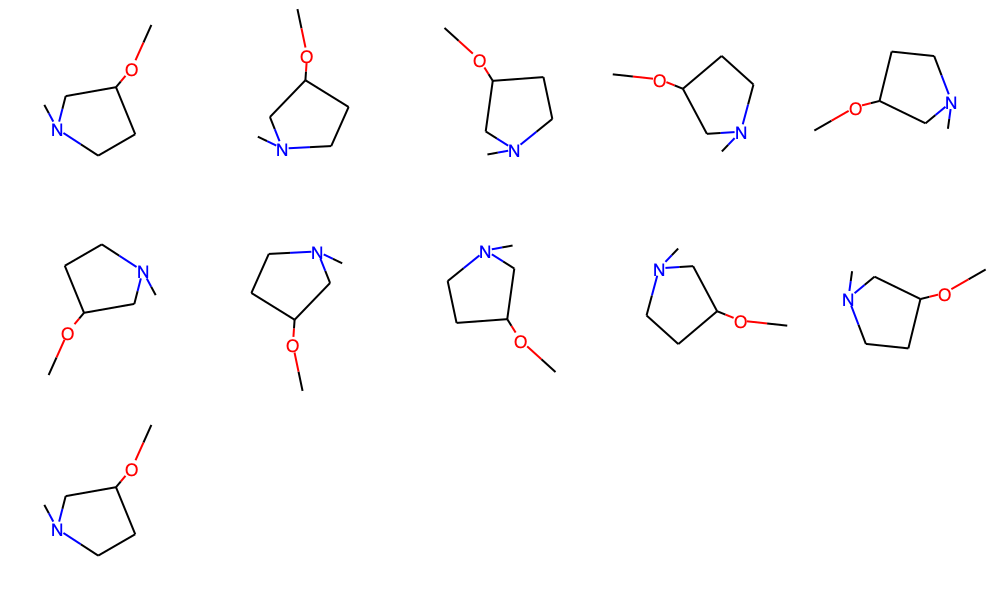

In [12]:
mols = Chem.SDMolSupplier("z_ax_rot.sdf")
Draw.MolsToGridImage(mols, molsPerRow=5)